### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.patches as mpatches

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [538]:
data = pd.read_csv('data/coupons.csv')

In [539]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [540]:
# check count
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

car column only contains 108 non NaN values. To preserve the majority of records, we will replace the NaN values with unknown. The only rows that we will remove from the data set are those with values 'do not drive' since the main goal of the studay it sto check the coupon acceptance on different driving situation.

2. Investigate the dataset for missing or problematic data.

In [541]:
# Check which columns contain NaN values
data.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [542]:
# For each column with NaN, check unique values to get a sense of the data
data.car.unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [543]:
data.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

We'll assume that nan, never, and less1 are respondents that don't go to bars

In [544]:
data.CoffeeHouse.unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

Just like in Bar, nan, never, and less1 will be equal to 0. The same transformation will be applied to CarryAway, RestaurantLessThan20, Restaurant20To50

In [545]:
data.CarryAway.unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [546]:
data.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [547]:
data.Restaurant20To50.unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [548]:
# replace rows with NaN in car with unknown and assign to cleandata
cleandata = data.fillna('unknown')

In [549]:
# remove entries where car = 'do not drive'
cleandata = cleandata.query("car != 'do not drive'")

In [550]:
# tbd
cleandata.income.unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [551]:
# perform transformations on Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, age, income and convert to numeric values 

cleandata['Bar'] = cleandata['Bar'].fillna(0)
cleandata['CoffeeHouse'] = cleandata['CoffeeHouse'].fillna(0)
cleandata['RestaurantLessThan20'] = cleandata['RestaurantLessThan20'].fillna(0)
cleandata['Restaurant20To50'] = cleandata['Restaurant20To50'].fillna(0)

conv_to_numeric = {'Bar': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'CoffeeHouse': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'CarryAway': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'RestaurantLessThan20': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'Restaurant20To50': {'never': 0, 'less1': 0, '1~3': 1, '4~8': 4, 'gt8': 8},
                    'age': {'50plus': 51, 'below21': 20},
                    'income': {'$37500 - $49999': 37500, '$62500 - $74999': 62500, '$12500 - $24999': 12500, '$75000 - $87499': 75000, '$50000 - $62499': 50000, '$25000 - $37499': 25000, '$100000 or More': 100001, '$87500 - $99999': 87500, 'Less than $12500': 12499}}

numericdata=cleandata.replace(conv_to_numeric)

In [552]:
# tbd 
numericdata.income.unique()

array([ 37500,  62500,  12500,  75000,  50000,  25000, 100001,  87500,
        12499], dtype=int64)

4. What proportion of the total observations chose to accept the coupon? 



In [553]:
# using groupby check total rows with Y = 0 or Y = 1
numericdata.groupby('Y').size().reset_index(name='Coupon Respondence')

,Y,Coupon Respondence
0,0,5462
1,1,7200


5462 out of 12662 accepted the coupon which is 43%

5. Use a bar plot to visualize the `coupon` column.

In [554]:
# df for bar plot group by coupon and acceptance
bardata=numericdata.groupby(['coupon','Y']).size().reset_index(name='size')

In [555]:
#fig = px.bar(bardata, x='coupon', y='size',color='Y')
#fig.show()

In [556]:
numericdata[numericdata.Y==1].groupby('coupon')['Y'].size().reset_index(name='size')

,coupon,size
0,Bar,825
1,Carry out & Take away,1757
2,Coffee House,1995
3,Restaurant(20-50),655
4,Restaurant(<20),1968


In [557]:
numericdata[numericdata.Y==0].groupby('coupon')['Y'].size().reset_index(name='size')

,coupon,size
0,Bar,1190
1,Carry out & Take away,632
2,Coffee House,1994
3,Restaurant(20-50),833
4,Restaurant(<20),813


In [558]:
numericdata.groupby('coupon')['Y'].size().reset_index(name='size')

,coupon,size
0,Bar,2015
1,Carry out & Take away,2389
2,Coffee House,3989
3,Restaurant(20-50),1488
4,Restaurant(<20),2781


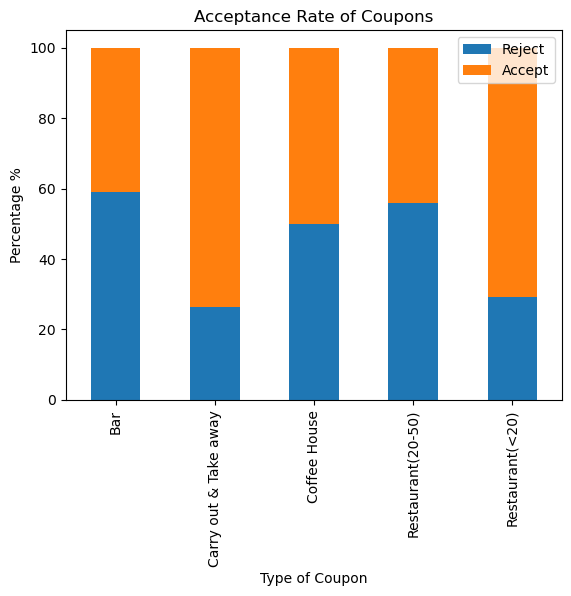

In [617]:
testdf = numericdata.groupby('coupon')['Y'].value_counts(normalize=True).mul(100).round(2).unstack()
testdf.plot(kind = 'bar', stacked = True)
plt.xlabel ('Type of Coupon')
plt.ylabel ('Percentage %')
plt.title ('Acceptance Rate of Coupons')
plt.legend(['Reject','Accept'])
plt.show ()

In [ ]:
# Add labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
# Add labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)
# Add legend
ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])
# Fix legend position
# ax.legend_.set_bbox_to_anchor([0.55, 0.7])
fig

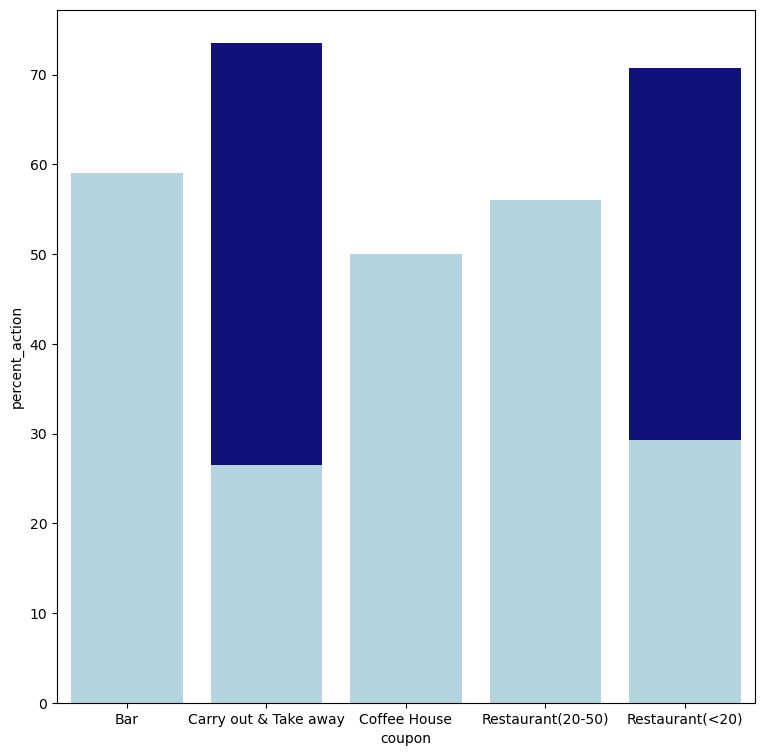

In [613]:
# set the figure size
plt.figure(figsize=(9, 9))

# from raw value to percentage
accept = numericdata[numericdata.Y==1].groupby('coupon')['Y'].size().reset_index(name='size')
reject = numericdata[numericdata.Y==0].groupby('coupon')['Y'].size().reset_index(name='size')
total = numericdata.groupby('coupon')['Y'].size().reset_index(name='size')
accept['percent_action'] = [i / j * 100 for i,j in zip(accept['size'], total['size'])]
reject['percent_action'] = [i / j * 100 for i,j in zip(reject['size'], total['size'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="coupon",  y="percent_action", data=accept, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="coupon", y="percent_action", data=reject, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Accepted Coupon= Yes')
bottom_bar = mpatches.Patch(color='lightblue', label='Accepted Coupon = No')
#plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [560]:
accept

,coupon,size,percent_action
0,Bar,825,40.942928
1,Carry out & Take away,1757,73.545416
2,Coffee House,1995,50.012534
3,Restaurant(20-50),655,44.018817
4,Restaurant(<20),1968,70.765912


In [561]:
reject

,coupon,size,percent_action
0,Bar,1190,59.057072
1,Carry out & Take away,632,26.454584
2,Coffee House,1994,49.987466
3,Restaurant(20-50),833,55.981183
4,Restaurant(<20),813,29.234088


In [562]:
total

,coupon,size
0,Bar,2015
1,Carry out & Take away,2389
2,Coffee House,3989
3,Restaurant(20-50),1488
4,Restaurant(<20),2781


In [563]:
# save image
fig.write_image("images/barcoupon.png")

6. Use a histogram to visualize the temperature column.

In [564]:
histdf = numericdata.groupby(['temperature','Y']).size().reset_index(name='size')

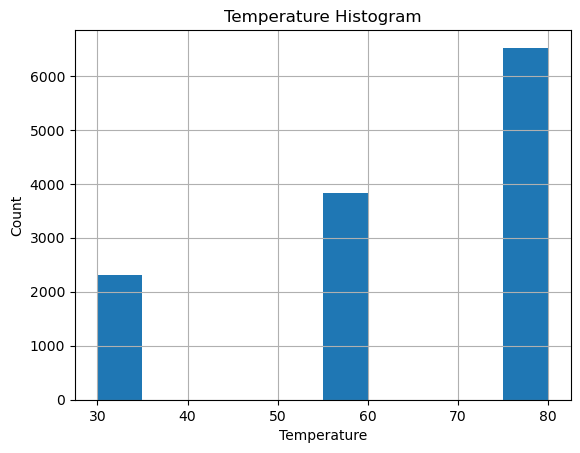

In [620]:
numericdata.hist(column='temperature')
plt.xlabel ('Temperature')
plt.ylabel ('Count')
plt.title ('Temperature Histogram')
plt.show ()

In [565]:
#histdata=newdata.groupby(['temperature','Y']).size().reset_index(name='size')
fig = px.histogram(numericdata, x='temperature',color='Y')
fig.show()

In [566]:
# save image
fig.write_image("images/temphist.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [567]:
# create df where coupon == 'Bar'
barcoupon = numericdata.query("coupon == 'Bar'")

In [568]:
barcoupon.count()

destination             2015
passanger               2015
weather                 2015
temperature             2015
time                    2015
coupon                  2015
expiration              2015
gender                  2015
age                     2015
maritalStatus           2015
has_children            2015
education               2015
occupation              2015
income                  2015
car                     2015
Bar                     2015
CoffeeHouse             2015
CarryAway               2015
RestaurantLessThan20    2015
Restaurant20To50        2015
toCoupon_GEQ5min        2015
toCoupon_GEQ15min       2015
toCoupon_GEQ25min       2015
direction_same          2015
direction_opp           2015
Y                       2015
dtype: int64

2. What proportion of bar coupons were accepted?


In [569]:
# remove unknown
barcoupon = barcoupon.query("Bar != 'unknown'")
barcoupon = barcoupon.query("RestaurantLessThan20 != 'unknown'")
barcoupon = barcoupon.query("income != 'unknown'")
barcoupon = barcoupon.query("age != 'unknown'")

In [570]:
# convert string columns to int
barcoupon['Bar'] = barcoupon['Bar'].astype(int)
barcoupon['age'] = barcoupon['age'].astype(int)
barcoupon['RestaurantLessThan20'] = barcoupon['RestaurantLessThan20'].astype(int)
barcoupon['income'] = barcoupon['income'].astype(int)

In [571]:
barcoupon.groupby('Y').size()

Y
0    1170
1     810
dtype: int64

817 bar coupons accepted out of 1994, 41% 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [572]:
#coupon.Bar.unique()

In [573]:
# group records into 2 bins, those who went 3 times or fewer and those who went more
barcoupon["bar_bucket"] = pd.cut(x=barcoupon.Bar, bins=[-1,3,8], labels=['<3','>3'])

In [574]:
# assign to a new df for this scenario
scenariodf = barcoupon.groupby(['bar_bucket','Y']).size().reset_index(name='size')

C:\Users\christian.dungca\AppData\Local\Temp\ipykernel_18104\3610471644.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [575]:
# check new column
scenariodf.bar_bucket.unique()

['<3', '>3']
Categories (2, object): ['<3' < '>3']

In [576]:
# visualize scenariodf
fig = px.bar(scenariodf, x='bar_bucket', y='size',color='Y')
fig.show()

In [577]:
# save image
fig.write_image("images/scenariodf.png")

In [578]:
# show scenariodf
scenariodf

,bar_bucket,Y,size
0,<3,0,1124
1,<3,1,659
2,>3,0,46
3,>3,1,151


For people that goes to bar less than 3 times, they accept the coupons 666 out of 1797 which is 37%
For people that goes to bar more than 3 times, they accept the coupons 151 out of 197 which is 77%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [579]:
# create scenariodf1 => bar > 1 and age > 25
scenariodf1 =  barcoupon.query("Bar > 1").query("age > 25 ")
scenariodf1 = scenariodf1.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf1, x='Y', y='size',color='Y')
fig.show()

In [580]:
# save image
fig.write_image("images/scenariodf1.png")

In [581]:
scenariodf1

,Y,size
0,0,31
1,1,103


In [582]:
# create scneariodf2 => bar < 1 and age < 25
scenariodf2 =  barcoupon.query("Bar < 1").query("age < 25 ")

scenariodf2 = scenariodf2.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf2, x='Y', y='size',color='Y')
fig.show()

In [583]:
# save image
fig.write_image("images/scenariodf2.png")

In [584]:
scenariodf2

,Y,size
0,0,195
1,1,123


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [585]:
# convert Bar column to int
#coupon['Bar'] = coupon['Bar'].astype(int)
scenariodf3 = barcoupon.query("Bar > 1").query("passanger != 'Kid(s)'").query("occupation != 'Farming Fishing & Forestry'")

scenariodf3 = scenariodf3.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf3, x='Y', y='size',color='Y')
fig.show()

In [586]:
# save image
fig.write_image("images/scenariodf3.png")

In [587]:
scenariodf3

,Y,size
0,0,43
1,1,146


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [588]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
#coupon['Bar'] = coupon['Bar'].astype(int)
scenariodf4 = barcoupon.query("Bar > 1").query("passanger != 'Kid(s)'").query("maritalStatus != 'Widowed'")

scenariodf4 = scenariodf4.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf4, x='Y', y='size',color='Y')
fig.show()


In [589]:
# save image
fig.write_image("images/scenariodf4.png")

In [590]:
scenariodf4

,Y,size
0,0,43
1,1,146


In [591]:
barcoupon.groupby('Y').size()

Y
0    1170
1     810
dtype: int64

In [592]:
# tbd
barcoupon.age.unique()
barcoupon.income.unique()

array([ 37500,  62500,  12500,  75000,  50000,  25000, 100001,  87500,
        12499])

In [593]:
# tbd
barcoupon.RestaurantLessThan20.unique()

array([4, 1, 0, 8])

In [594]:
# go to bars more than once a month and are under the age of 30
#coupon['Bar'] = coupon['Bar'].astype(int)
#coupon['age'] = coupon['age'].astype(int)
scenariodf5 = barcoupon.query("Bar > 1").query("age < 30")

scenariodf5 = scenariodf5.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf4, x='Y', y='size',color='Y')
fig.show()

In [595]:
# save image
fig.write_image("images/scenariodf5.png")

In [596]:
scenariodf5

,Y,size
0,0,26
1,1,108


In [597]:
# tbd
barcoupon.income.unique()

array([ 37500,  62500,  12500,  75000,  50000,  25000, 100001,  87500,
        12499])

In [598]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
#barcoupon['RestaurantLessThan20'] = barcoupon['RestaurantLessThan20'].astype(int)
#barcoupon['income'] = barcoupon['income'].astype(int)
scenariodf6 = barcoupon.query("RestaurantLessThan20 > 4").query("income < 50000")

scenariodf6 = scenariodf6.groupby('Y').size().reset_index(name='size')

fig = px.bar(scenariodf6, x='Y', y='size',color='Y')
fig.show()

In [599]:
# save image
fig.write_image("images/scenariodf6.png")

In [600]:
scenariodf6

,Y,size
0,0,39
1,1,57


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [601]:
# create df where coupon == 'Bar'
coffeecoupon = numericdata.query("coupon == 'Coffee House'")

In [602]:
# check acceptance of coupon between male and female

# assign to a new df for this scenario
coffeescenariodf = coffeecoupon.groupby(['gender','Y']).size().reset_index(name='size')

In [603]:
# visualize coffeescenariodf
fig = px.bar(coffeescenariodf, x='gender', y='size',color='Y')
fig.show()

In [604]:
# save image
fig.write_image("images/coffeescenariodf.png")

In [605]:
coffeescenariodf

,gender,Y,size
0,Female,0,1034
1,Female,1,1010
2,Male,0,960
3,Male,1,985


Female acceptance of coffee coupon is 49%
Male acceptance of coffee coupon is 51%
Acceptance of both male and female is almost the same

In [606]:
# check acceptance of coupon based on expiration

# assign to a new df for this scenario
coffeescenariodf1 = coffeecoupon.groupby(['expiration','Y']).size().reset_index(name='size')

fig = px.bar(coffeescenariodf1, x='expiration', y='size',color='Y')
fig.show()

# save image
fig.write_image("images/coffeescenariodf1.png")

coffeescenariodf1


,expiration,Y,size
0,1d,0,730
1,1d,1,1033
2,2h,0,1264
3,2h,1,962


Acceptance of coffee coupon if expiration is 1d, 1033/1763 * 100, 59%
Acceptance of coffee coupon if expiration is 2h, 962/2226 * 100, 43%

In [607]:
# check acceptance of coupon based on distance

# assign to a new df for this scenario
coffeescenariodf2 = coffeecoupon.groupby(['toCoupon_GEQ5min','Y']).size().reset_index(name='size')

fig = px.bar(coffeescenariodf2, x='toCoupon_GEQ5min', y='size',color='Y')
fig.show()

# save image
fig.write_image("images/coffeescenariodf2.png")

coffeescenariodf2



,toCoupon_GEQ5min,Y,size
0,1,0,1994
1,1,1,1995


In [608]:
# check acceptance of coupon based on distance

# assign to a new df for this scenario
coffeescenariodf3 = coffeecoupon.groupby(['toCoupon_GEQ15min','Y']).size().reset_index(name='size')

fig = px.bar(coffeescenariodf3, x='toCoupon_GEQ15min', y='size',color='Y')
fig.show()

# save image
fig.write_image("images/coffeescenariodf3.png")

coffeescenariodf3



,toCoupon_GEQ15min,Y,size
0,0,0,865
1,0,1,1054
2,1,0,1129
3,1,1,941


In [609]:
# assign to a new df for this scenario
coffeescenariodf4 = coffeecoupon.groupby(['toCoupon_GEQ25min','Y']).size().reset_index(name='size')

fig = px.bar(coffeescenariodf4, x='toCoupon_GEQ25min', y='size',color='Y')
fig.show()

# save image
fig.write_image("images/coffeescenariodf4.png")

coffeescenariodf4



,toCoupon_GEQ25min,Y,size
0,0,0,1791
1,0,1,1888
2,1,0,203
3,1,1,107
